In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading Datasets
table1 = pd.read_csv('train_transaction.csv') # Transactions Dataset
table2 = pd.read_csv('train_identity.csv') # Identity Dataset

##**DATA UNDERSTANDING / EDA**

In [5]:
table1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Displaying structure of dataset
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69472 entries, 0 to 69471
Columns: 394 entries, TransactionID to V339
dtypes: float64(330), int64(50), object(14)
memory usage: 208.8+ MB


In [ ]:
# Listing features
table1.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [ ]:
# Finding instances of fraud
table1['isFraud'].value_counts()

,count
isFraud,
0,67606
1,1866


In [ ]:
# Finding index of fraud rows
table1[table1['isFraud']==1].index

Index([  203,   240,   243,   245,   288,   367,   405,   630,   683,   736,
       ...
       69183, 69199, 69210, 69219, 69223, 69274, 69310, 69323, 69345, 69373],
      dtype='int64', length=1866)

In [ ]:
# Analyzing Individual rows
# Looking at 'TransactionDt' feature
print('Minimum:', table1['TransactionDT'].min())
print('Maximum:', table1['TransactionDT'].max())
print('Range:', table1['TransactionDT'].max() - table1['TransactionDT'].min())

Minimum: 86400
Maximum: 1558226
Range: 1471826


In [ ]:
# Range of TransactionID Column numerical columns
print('Minimum:', table1['TransactionID'].min())
print('Maximum:', table1['TransactionID'].max())
print('Range:', table1['TransactionID'].max() - table1['TransactionID'].min())

Minimum: 2987000
Maximum: 3056471
Range: 69471


In [ ]:
# Descriptive Statistics
table1.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,6.947200e+04,69472.000000,6.947200e+04,69472.000000,69472.000000,68491.000000,69469.000000,69127.000000,64570.000000,64570.000000,22720.000000,4859.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,31345.000000,32487.000000,37847.000000,24780.000000,7591.000000,3722.000000,13238.000000,13238.000000,50154.000000,21147.000000,6419.000000,5774.000000,6646.000000,46841.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,21147.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,50148.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.00000,37845.000000,37845.000000,37845.000000,37845.000000,37845.000000,37845.00000,37845.000000,37845.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,46837.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.0,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.00000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,

In [ ]:
# Unique values of ProductCD column
table1['ProductCD'].value_counts()

,count
ProductCD,
W,43248
H,10933
C,7261
R,6097
S,1933


In [ ]:
# Unique columns of card columns
for i in range(1,7):
  print(table1['card'+str(i)].value_counts())

card1
7919     1896
9500     1446
6019     1259
17188    1192
15885    1035
         ... 
12714       1
16722       1
1812        1
2381        1
3257        1
Name: count, Length: 6383, dtype: int64
card2
321.0    5574
111.0    5207
555.0    4776
490.0    4101
583.0    3887
170.0    2769
514.0    2253
194.0    2123
545.0    1632
399.0    1546
360.0    1425
174.0    1246
512.0    1017
553.0     988
408.0     895
100.0     818
361.0     815
225.0     728
215.0     726
562.0     721
567.0     701
327.0     669
500.0     620
476.0     619
481.0     608
375.0     594
268.0     556
404.0     541
543.0     537
298.0     519
296.0     485
264.0     462
103.0     414
494.0     376
453.0     339
310.0     333
161.0     329
250.0     314
204.0     305
199.0     297
390.0     293
269.0     287
417.0     276
455.0     269
206.0     248
343.0     232
480.0     225
418.0     221
532.0     208
177.0     207
393.0     201
181.0     188
122.0     187
369.0     180
528.0     156
127.0     143
452.0     

In [ ]:
# Viewing counts for each card feature individually
print(table1['card6'].value_counts())

card6
debit              46712
credit             22748
debit or credit        6
charge card            3
Name: count, dtype: int64


In [ ]:
# Viewing counts for each address feature individually
print(table1['addr2'].value_counts())

addr2
87.0     62085
60.0      2106
96.0       124
32.0        42
16.0        40
31.0        39
26.0        20
65.0        19
19.0        12
59.0        10
13.0         7
102.0        6
71.0         6
72.0         5
21.0         5
88.0         5
98.0         4
47.0         3
44.0         3
24.0         3
101.0        3
69.0         2
29.0         2
34.0         2
17.0         2
78.0         2
66.0         2
35.0         1
43.0         1
15.0         1
25.0         1
57.0         1
22.0         1
30.0         1
14.0         1
49.0         1
83.0         1
75.0         1
Name: count, dtype: int64


In [ ]:
# Viewing counts for each distance feature individually
print(table1['dist1'].value_counts())

dist1
0.0       1778
1.0       1605
2.0       1544
4.0       1222
3.0       1163
          ... 
1343.0       1
2419.0       1
347.0        1
1826.0       1
2294.0       1
Name: count, Length: 1461, dtype: int64


In [ ]:
# Viewing counts for each P_emaildomain feature individually
print(table1['P_emaildomain'].value_counts())

P_emaildomain
gmail.com           25313
yahoo.com           11386
hotmail.com          5331
anonymous.com        5022
aol.com              3433
comcast.net          1229
icloud.com            634
msn.com               564
outlook.com           541
att.net               465
sbcglobal.net         434
verizon.net           415
live.com              342
bellsouth.net         272
ymail.com             252
cox.net               235
me.com                208
yahoo.com.mx          181
charter.net           177
optonline.net         155
live.com.mx            90
rocketmail.com         75
mac.com                71
earthlink.net          69
mail.com               65
embarqmail.com         49
juno.com               46
gmail                  46
roadrunner.com         46
twc.com                44
windstream.net         43
frontiernet.net        38
frontier.com           36
web.de                 36
netzero.com            31
outlook.es             30
prodigy.net.mx         29
q.com                  2

In [ ]:
# Viewing counts for each P_emaildomain feature individually
print(table1['R_emaildomain'].value_counts())

R_emaildomain
gmail.com           7220
hotmail.com         3265
anonymous.com       3257
yahoo.com           1724
aol.com              714
comcast.net          430
outlook.com          285
yahoo.com.mx         180
msn.com              167
icloud.com           164
verizon.net          144
sbcglobal.net        117
live.com              94
live.com.mx           90
att.net               88
cox.net               85
me.com                85
bellsouth.net         81
optonline.net         43
ymail.com             43
web.de                36
mac.com               35
outlook.es            29
prodigy.net.mx        29
hotmail.es            29
hotmail.fr            26
mail.com              24
frontier.com          19
embarqmail.com        19
charter.net           17
juno.com              17
gmx.de                15
yahoo.fr              14
windstream.net        14
roadrunner.com        13
cfl.rr.com            12
q.com                 11
earthlink.net         11
gmail                 10
yahoo.es   

In [ ]:
### Looking at identity dataset now
table2.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


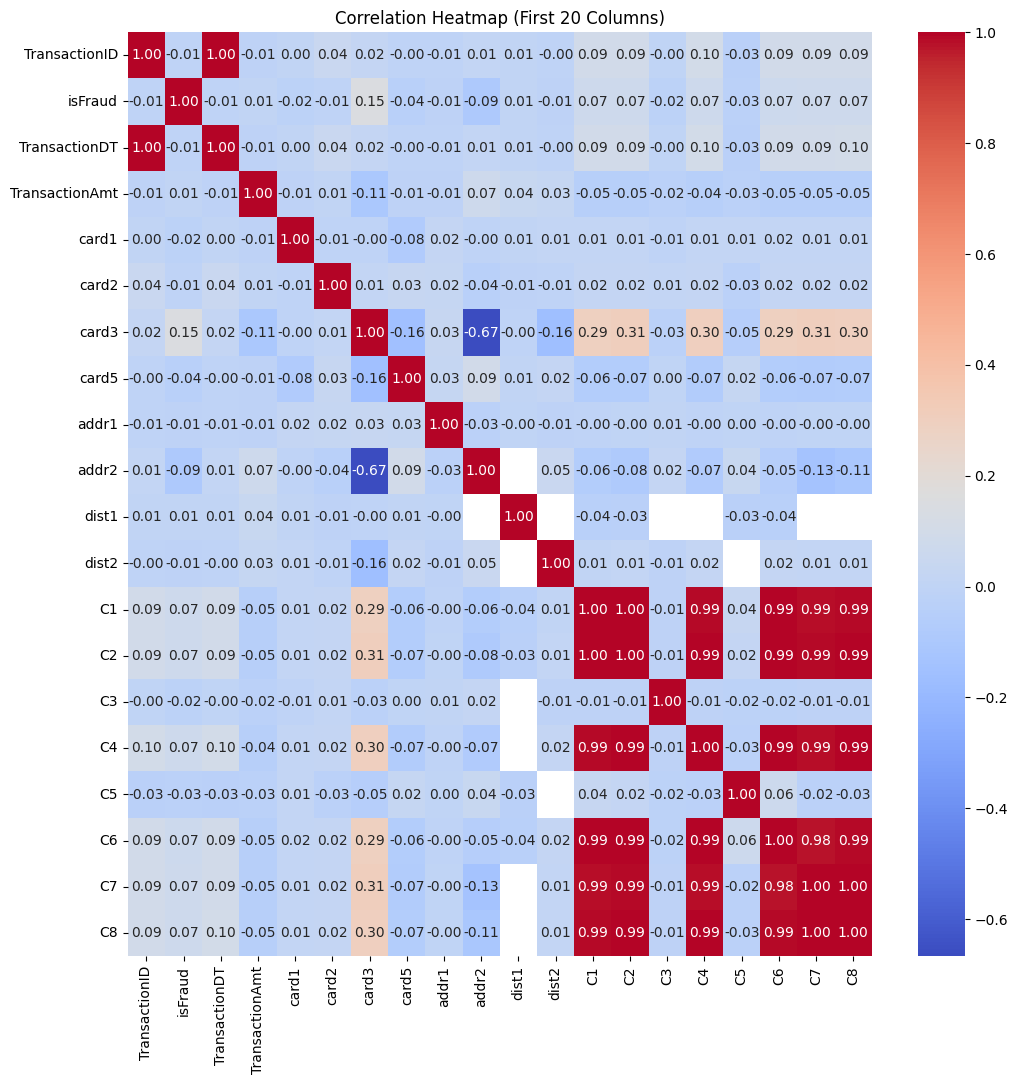

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_table = table1.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_table.corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr.iloc[:20, :20], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (First 20 Columns)')
plt.show()


In [ ]:
print("Non-numeric columns removed:", table1.select_dtypes(exclude=['float64', 'int64']).columns.tolist())

Non-numeric columns removed: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


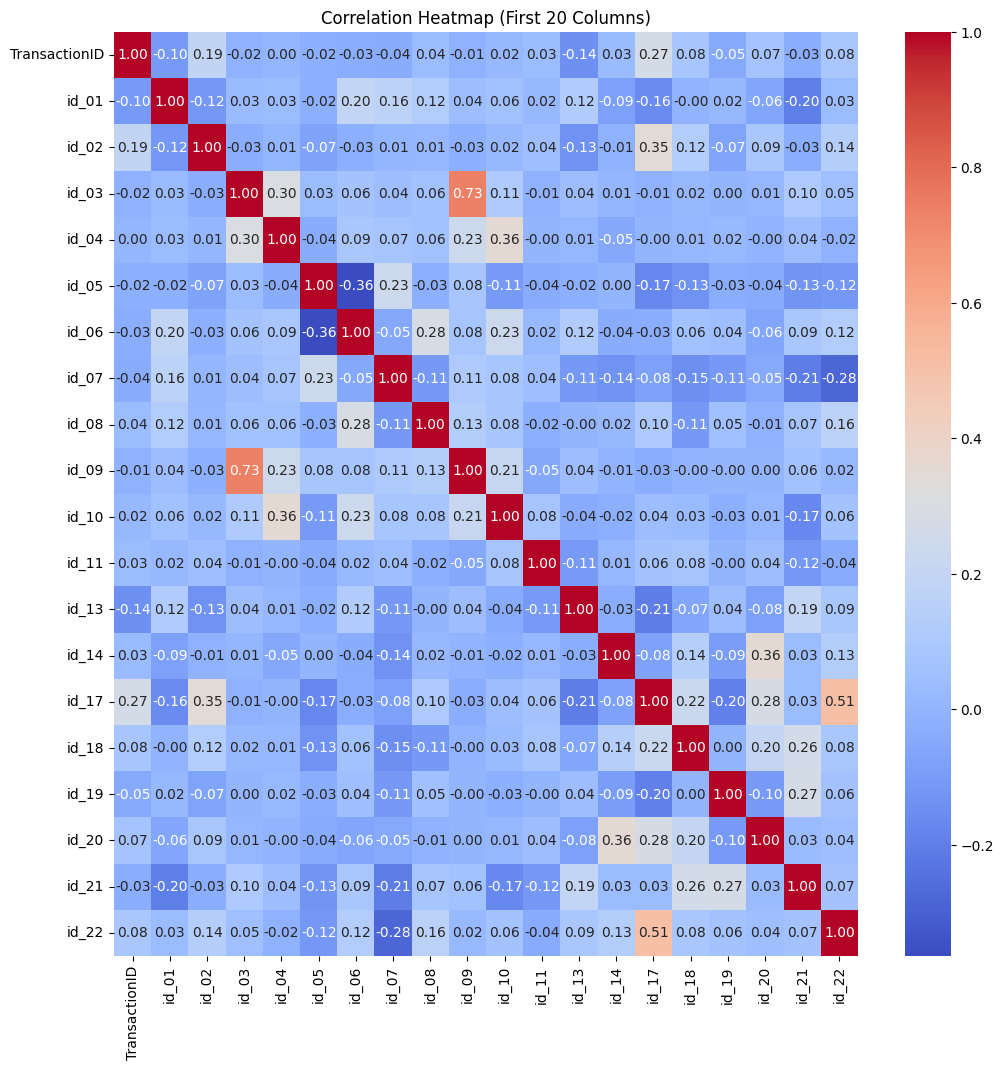

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_table2 = table2.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_table2.corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr.iloc[:20, :20], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (First 20 Columns)')
plt.show()

##**PRE-PROCESING**

In [ ]:
# Check how many missing values each column has (as a percentage)
missing = table1.isnull().sum() / len(table1)
missing = missing[missing > 0].sort_values(ascending=False)
print(missing.head(20))

# Drop ROWS with more than 70% missing values
table1 = table1.dropna(thresh=0.3 * table1.shape[1])

# Fill remaining missing numeric values with median, and categorical with mode
for col in table1.select_dtypes(include=['float64', 'int64']).columns:
    table1[col] = table1[col].fillna(table1[col].median())

for col in table1.select_dtypes(include=['object']).columns:
    table1[col] = table1[col].fillna(table1[col].mode()[0])

D7               0.946424
dist2            0.930058
D13              0.916887
D12              0.907603
D14              0.904336
D6               0.890733
M9               0.824073
M8               0.824073
M7               0.824073
D9               0.809448
D8               0.809448
R_emaildomain    0.730251
V158             0.728481
V154             0.728481
V139             0.728481
V161             0.728481
V160             0.728481
V148             0.728481
V149             0.728481
V150             0.728481
dtype: float64


In [ ]:
# Check how many missing values each column in table2 has (as a percentage)
missing = table2.isnull().sum() / len(table2)
missing = missing[missing > 0].sort_values(ascending=False)
print(missing.head(20))

# Drop ROWS with more than 70% missing values
table2 = table2.dropna(thresh=0.3 * table2.shape[1])

# Fill remaining missing numeric values with median, and categorical with mode
for col in table2.select_dtypes(include=['float64', 'int64']).columns:
    table2[col] = table2[col].fillna(table2[col].median())

for col in table2.select_dtypes(include=['object']).columns:
    table2[col] = table2[col].fillna(table2[col].mode()[0])

# Optional: check if any missing values are still left
print("Remaining missing values:", table2.isnull().sum().sum())

id_24         0.966413
id_25         0.963829
id_08         0.963695
id_07         0.963695
id_26         0.963674
id_21         0.963654
id_22         0.963612
id_23         0.963612
id_27         0.963612
id_18         0.689676
id_03         0.552970
id_04         0.552970
id_10         0.489029
id_09         0.489029
id_33         0.449100
id_30         0.407039
id_32         0.406833
id_34         0.406328
id_14         0.390122
DeviceInfo    0.158081
dtype: float64
Remaining missing values: 0


In [ ]:
# Merge the transaction and identity datasets using the common key 'TransactionID'
data = pd.merge(table1, table2, on='TransactionID', how='left')

# Check the new dataset shape and basic info
print(data.shape)
data.info()

(69470, 434)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69470 entries, 0 to 69469
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(353), int64(50), object(31)
memory usage: 230.0+ MB


In [ ]:
# Convert all object (string) columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))


In [ ]:
# Show basic info about the merged dataset
print("Shape of merged dataset:", data.shape)
print("\nData types and non-null counts:")
data.info()

Shape of merged dataset: (69470, 434)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69470 entries, 0 to 69469
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(353), int64(81)
memory usage: 230.0 MB


In [ ]:
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,"69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00

In [ ]:
# Display the first few rows to preview the data
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,4,13926,375.00,150.00,1,142.00,1,315.00,87.00,19.00,30.00,16,16,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,101.00,13.00,27.00,10.00,0.00,0.00,63.08,0.67,13.00,13.00,0.00,0.00,0.00,0.00,0,1,1,2,0,1,0,0,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,N

In [ ]:
# Quick numeric summary (to see ranges, means, std, etc.)
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,"69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00","69,470.00

In [ ]:
# Total number of missing values left
print("Total missing values remaining:", data.isnull().sum().sum())

# Columns with missing values (if any)
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nColumns still with missing values:\n", missing.head(10))

Total missing values remaining: 1032562

Columns still with missing values:
 id_01    44894
id_02    44894
id_03    44894
id_04    44894
id_05    44894
id_06    44894
id_07    44894
id_08    44894
id_09    44894
id_10    44894
dtype: int64


In [ ]:
# Fill remaining missing numeric columns with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

# Fill categorical columns (if any) with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify again
print("Remaining missing values:", data.isnull().sum().sum())

Remaining missing values: 0


In [ ]:
data.head(25)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,4,13926,375.00,150.00,1,142.00,1,315.00,87.00,19.00,30.00,16,16,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,101.00,13.00,27.00,10.00,0.00,0.00,63.08,0.67,13.00,13.00,0.00,0.00,0.00,0.00,0,1,1,2,0,1,0,0,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,"98,915.00",0.00,0.00,0.00,0.00,14.00,-34.00,0.00,0.00,10

# **EDA**

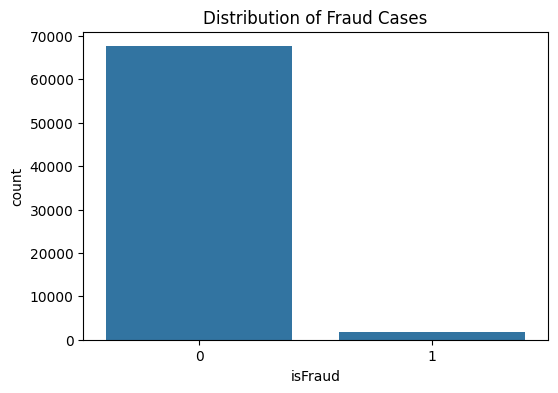

         Count  Percentage
isFraud                   
0        67604       97.31
1         1866        2.69


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud Cases')
plt.show()

counts = data['isFraud'].value_counts()
percent = data['isFraud'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': counts, 'Percentage': percent}))

In [ ]:
correlations = data.corr()['isFraud'].sort_values(ascending=False)

print("Top 10 features positively correlated with isFraud:")
print(correlations.head(10))

print("\nTop 10 features negatively correlated with isFraud:")
print(correlations.tail(10))


Top 10 features positively correlated with isFraud:
isFraud   1.00
V201      0.24
V189      0.22
V45       0.21
V200      0.21
V257      0.20
V188      0.19
V87       0.19
V171      0.19
V44       0.19
Name: isFraud, dtype: float64

Top 10 features negatively correlated with isFraud:
V90         -0.07
V70         -0.08
V30         -0.08
V69         -0.08
V29         -0.08
id_01       -0.09
ProductCD   -0.10
id_35       -0.11
M1            NaN
V107          NaN
Name: isFraud, dtype: float64


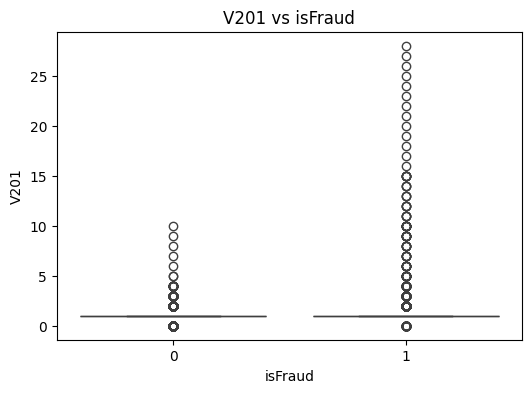

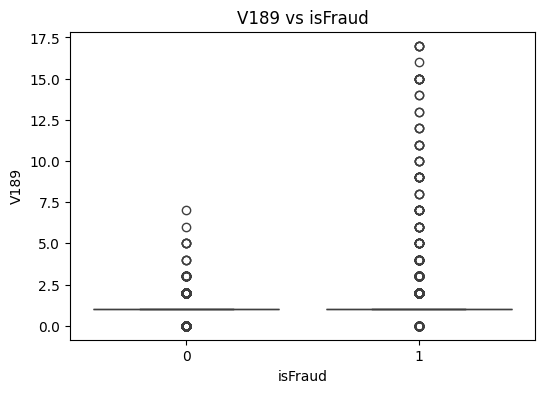

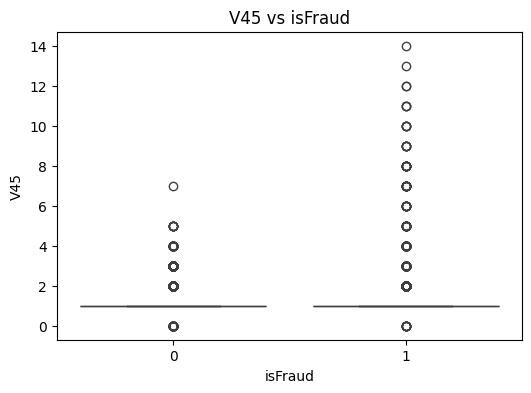

In [ ]:
top_features = ['V201', 'V189', 'V45']

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='isFraud', y=feature, data=data)
    plt.title(f'{feature} vs isFraud')
    plt.show()


# **1. BASELINE MODEL - NO IMBALANCE TECHNIQUE**

[[20236    45]
 [  409   151]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20281
           1       0.77      0.27      0.40       560

    accuracy                           0.98     20841
   macro avg       0.88      0.63      0.69     20841
weighted avg       0.97      0.98      0.97     20841



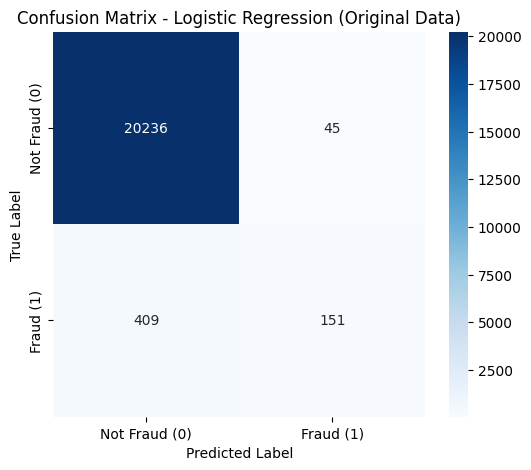

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression (Original Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **2. BASELINE MODEL - RANDOM OVERSAMPLING**

[[17099  3183]
 [ 4354 15927]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     20282
           1       0.83      0.79      0.81     20281

    accuracy                           0.81     40563
   macro avg       0.82      0.81      0.81     40563
weighted avg       0.82      0.81      0.81     40563



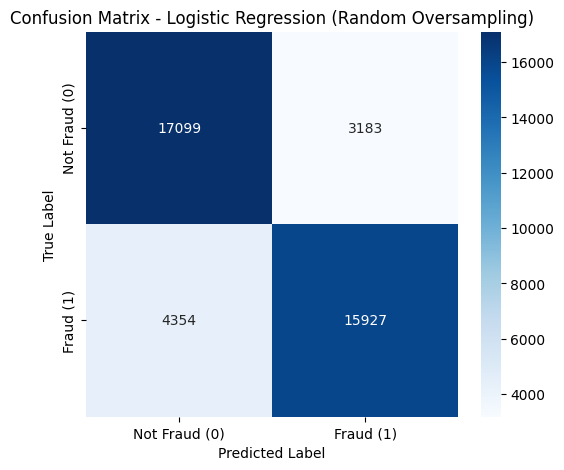

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop('isFraud', axis=1)
y = data['isFraud']

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression (Random Oversampling)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **3. BASELINE MODEL - RANDOM UNDERSAMPLING**

[[440 120]
 [147 413]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       560
           1       0.77      0.74      0.76       560

    accuracy                           0.76      1120
   macro avg       0.76      0.76      0.76      1120
weighted avg       0.76      0.76      0.76      1120



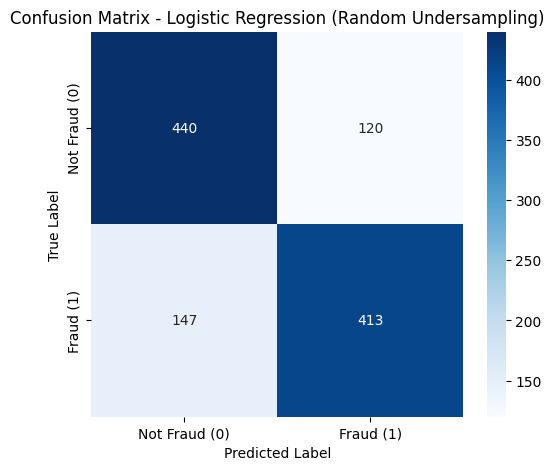

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('isFraud', axis=1)
y = data['isFraud']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression (Random Undersampling)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **4. BASELINE MODEL - SMOTE**

[[18634  1648]
 [ 2188 18093]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     20282
           1       0.92      0.89      0.90     20281

    accuracy                           0.91     40563
   macro avg       0.91      0.91      0.91     40563
weighted avg       0.91      0.91      0.91     40563



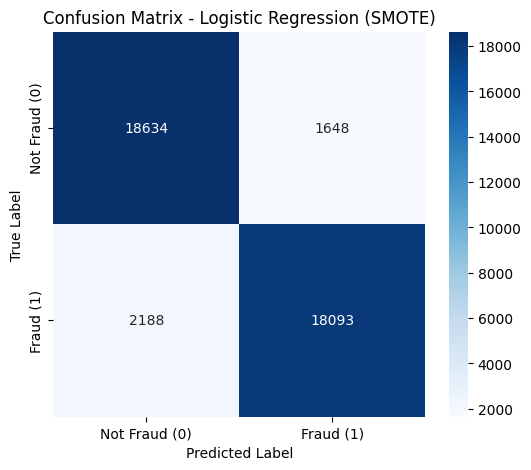

In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('isFraud', axis=1)
y = data['isFraud']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression (SMOTE)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **5. BASELINE MODEL - SMOTEENN**

[[14248  1359]
 [ 1695 16844]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     15607
           1       0.93      0.91      0.92     18539

    accuracy                           0.91     34146
   macro avg       0.91      0.91      0.91     34146
weighted avg       0.91      0.91      0.91     34146



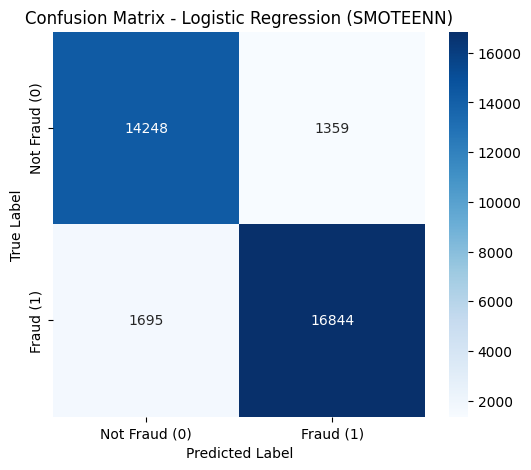

In [ ]:
from imblearn.combine import SMOTEENN

X = data.drop('isFraud', axis=1)
y = data['isFraud']

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression (SMOTEENN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **6. BASELINE MODEL - ADASYN**

[[18561  1720]
 [ 2297 18109]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     20281
           1       0.91      0.89      0.90     20406

    accuracy                           0.90     40687
   macro avg       0.90      0.90      0.90     40687
weighted avg       0.90      0.90      0.90     40687



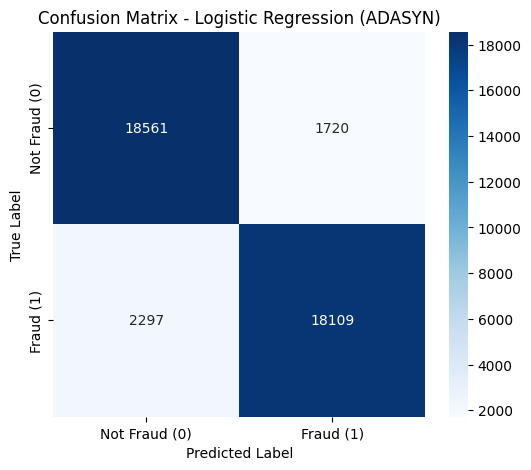

In [ ]:
from imblearn.over_sampling import ADASYN

X = data.drop('isFraud', axis=1)
y = data['isFraud']

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression (ADASYN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **PCA**

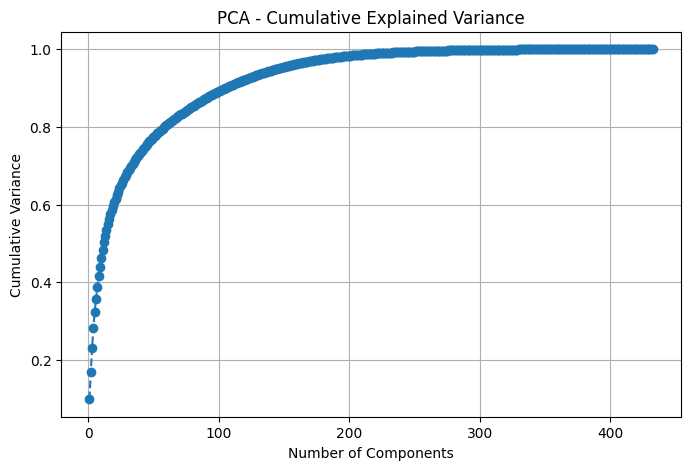

Number of components to explain 90% variance: 106


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('isFraud', axis=1))
y = data['isFraud']

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('PCA - Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

n_components = np.argmax(cumulative_variance >= 0.9) + 1
print("Number of components to explain 90% variance:", n_components)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = data.drop('isFraud', axis=1)
y = data['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=106)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[20255    26]
 [  459   101]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20281
           1       0.80      0.18      0.29       560

    accuracy                           0.98     20841
   macro avg       0.89      0.59      0.64     20841
weighted avg       0.97      0.98      0.97     20841



In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier

X = data.drop('isFraud', axis=1)
y = data['isFraud']

sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

pca = PCA(n_components=106)
X_res_pca = pca.fit_transform(X_res_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_res_pca, y_res, test_size=0.3, random_state=42, stratify=y_res)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[15113   494]
 [  241 18298]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     15607
           1       0.97      0.99      0.98     18539

    accuracy                           0.98     34146
   macro avg       0.98      0.98      0.98     34146
weighted avg       0.98      0.98      0.98     34146

